# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

ALAVERDOV Antoine & LEMEILLEUR Clémence 4 IR B1

### In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

In [1]:
# We will need to use the following libraries:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, RocCurveDisplay

#About visualization (the same as in the TP):
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np

from utils import load_from_csv

### A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

En réduisant max_depth, nous réduisons le risque d'overfitting. Nous pouvons également modifier min_samples_leaf (nombre minimum d'observations qu'un nœud terminal doit avoir). Nous pouvons aussi changer le critère (entropie ou gini) ou le type de splitter.

Nous pouvons jouer sur plusieurs critères afin d'observer des résultats différents. C'est ce que nous avons essayé d'illuster à travers nos choix d'arbres: 
- Plus max_depth est petit, plus le risque d'overfitting sera bas. 
- La variale min_samples_leaf
- Le type de splitter 

tree1 = DecisionTreeClassifier()

tree2 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=13, splitter="random")

tree3 = DecisionTreeClassifier(max_depth=1,  min_samples_leaf=5).

tree4 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, splitter="random")

tree5 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=12)

tree6 = DecisionTreeClassifier(min_samples_leaf=11, splitter="random")


### Train a decision tree for each of the previous configurations on the full dataset

In [2]:
# Récupération des Data comme en TP
examples, labels, features, prediction = load_from_csv("./compass.csv")
x_train, x_test, y_train, y_test = train_test_split(examples, labels, test_size=0.2)


tree1 = DecisionTreeClassifier().fit(x_train, y_train)

tree2 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=13, splitter="random").fit(x_train, y_train)

tree3 = DecisionTreeClassifier(max_depth=1,  min_samples_leaf=5).fit(x_train, y_train)

tree4 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, splitter="random").fit(x_train, y_train)

tree5 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=12).fit(x_train, y_train)

tree6 = DecisionTreeClassifier(min_samples_leaf=11, splitter="random").fit(x_train, y_train)

treeList = [tree1, tree2, tree3, tree4, tree5, tree6]


nb=1
for i in treeList:
    score = cross_val_score(i, examples, labels, scoring='accuracy')
    print("cross val score pour tree ", nb, ": ", score.mean())
    nb=nb+1

print("")

nb=1
for i in treeList:
    predicted_values = i.predict(x_test)
    print("f1 score pour tree ", nb, ":", f1_score(y_test, predicted_values))
    nb=nb+1



cross val score pour tree  1 :  0.6466875904925493
cross val score pour tree  2 :  0.6351228900060253
cross val score pour tree  3 :  0.6351228900060253
cross val score pour tree  4 :  0.6616721674145885
cross val score pour tree  5 :  0.6590177792566345
cross val score pour tree  6 :  0.6595841614432045

f1 score pour tree  1 : 0.5660818713450292
f1 score pour tree  2 : 0.48357424441524316
f1 score pour tree  3 : 0.48357424441524316
f1 score pour tree  4 : 0.5747938751472321
f1 score pour tree  5 : 0.5977011494252873
f1 score pour tree  6 : 0.593505039193729


### Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different typologies

In [4]:

# Nous avons choisi les arbres 2 et 4 pour leur configurations différentes
# Accuracy = nombre de prédictions justes/ nombre total des prédictions

training2 = cross_val_score(tree2, x_train, y_train,  scoring='accuracy')
training4 = cross_val_score(tree4, x_train, y_train,  scoring='accuracy')

test2 = cross_val_score(tree2, x_test, y_test,  scoring='accuracy')
test4 = cross_val_score(tree4, x_test, y_test,  scoring='accuracy')


print('Voici les résultats obtenus:')

print("")

print('training2: ', training2.mean())
print('training4: ', training4.mean())

print("")

print('test2: ', test2.mean())
print('test4: ', test4.mean())


Voici les résultats obtenus:

training2:  0.6370314775148561
training4:  0.6574241172072208

test2:  0.6009478672985782
test4:  0.6436018957345973


### Propose an experimental study that shows the transition phase from underfitting to overfitting 

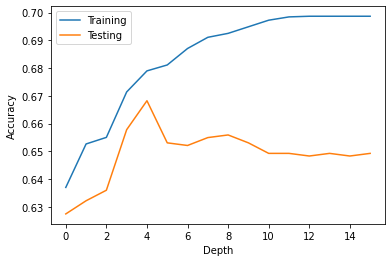

In [5]:
# Si on ajuste trop le modèle on aura certe de bons résultats avec l'ensemble des données que nous avons mais il sera bien moins précis pour de nouvelles données
# Si on ajuste pas assez le modèle on aura certe de bons résultats avec de nouvelles données mais il sera bien moins précis pour les données que nous avons.

training_prediction = []
test_prediction = []

max_depth = 17

for depth in range(1, max_depth):
    clf = DecisionTreeClassifier(max_depth = depth).fit(x_train, y_train)
    training_prediction += [accuracy_score(clf.predict(x_train), y_train)]
    test_prediction += [accuracy_score(clf.predict(x_test), y_test)]

#Affichage des résultats
plt.plot(training_prediction, label='Training')
plt.plot(test_prediction, label='Testing')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

### Construct the confusion matrix on a particular good configuration (after explaining your choice)

In [8]:
#Pour cette partie nous avons choisi d'utiliser l'arbre 7 défini plus bas puisqu'il a un bon score de précision
#Nous n'avons pas configuré le splitter à random puisque les résultats sans cette configuration semblent être meilleurs
#Nous avons choisi de mettre min_samples_leaf à 1 également puisque nous obtenant le meilleur score et f pour cette valeur.
#Pour max_depth nous avons choisi 4 puisque sur le graphe juste au dessus nous voyons que si nous depassons 4 la courbe de test s'éloigne considérablement de la courbe de training.

#Nous étudierons donc la matrice de confusion pour cet arbre

tree7 = DecisionTreeClassifier(min_samples_leaf=1,max_depth=4, splitter="random").fit(x_train, y_train)
predictions = tree7.predict(x_test)

print("La matrice de confusion pour l'arbre 7 est :")

Matrix = confusion_matrix(y_test, predictions)
print(Matrix)


La matrice de confusion pour l'arbre 7 est :
[[450 153]
 [208 244]]


### Provide an evaluation of the fairness of the model based on the False Positive Rate

In [10]:
tn, fp, fn, tp = Matrix.ravel()
fp_rate =  fp/(tn+fp)

print('FP_rate :', fp_rate)

# Cela signifie que dans 25% des cas l'algorithme va prédire qu'une personne va commettre un crime alors que ce ne sera pas le cas. 
#Cette valeur eest donc assez haute et reste à améliorer en entrainant d'avantage l'algo! 

FP_rate : 0.2537313432835821
